In [1]:
# !pip install pillow --upgrade
# !pip install python-igraph
# !pip install graspologic
# !pip install networkx
# !pip install matplotlib
# !pip install torch_geometric
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+${CUDA}.html
# !pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.7.0.html

In [2]:
!cp drive/MyDrive/code/utils.py .
!cp drive/MyDrive/code/dataset.py .
!cp drive/MyDrive/code/model.py .
!cp drive/MyDrive/code/classifier.py .
# !cp drive/MyDrive/code/utils.py . 

In [3]:
from utils import *
from dataset import *
from model import *
from classifier import *

In [4]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  

GraphicalLassoCV(alphas=[0.001, 0.002], assume_centered=False, cv=None,
                 enet_tol=0.0001, max_iter=100, mode='cd', n_jobs=None,
                 n_refinements=4, tol=0.0001, verbose=False)
GraphicalLassoCV(alphas=[0.001, 0.002], assume_centered=False, cv=None,
                 enet_tol=0.0001, max_iter=100, mode='cd', n_jobs=None,
                 n_refinements=4, tol=0.0001, verbose=False)
(22.71347444539795, 22.450463703987534)
10.30303648432677
50
50
50
50
50
50
50
50


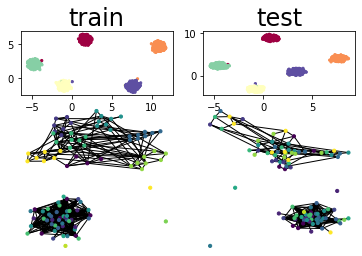

[1, 2, 3, 0, 2, 2, 0, 3, 0, 1, 3, 2, 4, 2, 0, 1, 4, 1, 2, 4, 0, 3, 3, 4, 4, 1, 2, 4, 3, 0, 1, 3, 2, 3, 4, 2, 1, 1, 4, 2, 1, 2, 3, 1, 2, 1, 0, 1, 1, 0, 1, 4, 2, 1, 1, 2, 2, 0, 3, 1, 4, 2, 2, 0, 2, 1, 3, 0, 2, 4, 0, 3, 0, 4, 2, 4, 2, 1, 4, 0, 3, 0, 1, 1, 4, 2, 2, 4, 4, 3, 1, 3, 4, 2, 4, 3, 1, 3, 3, 0, 2, 3, 1, 2, 4, 0, 3, 3, 3, 2, 1, 4, 3, 2, 1, 1, 4, 3, 1, 2, 1, 1, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4, 0, 2, 0, 4, 0, 2, 3, 2, 4, 0, 0, 3, 0, 0, 4, 0, 3, 2, 3, 1, 1, 3, 4, 0, 3, 0, 3, 0, 0, 0, 0, 2, 1, 2, 3, 4, 0, 1, 2, 3, 2, 4, 4, 3, 0, 4, 0, 2, 1, 4, 2, 3, 3, 4, 2, 4, 3, 2, 1, 2, 4, 3, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 3, 1, 0, 4, 4, 2, 4, 4, 1, 2, 4, 3, 4, 4, 2, 3, 3, 1, 2, 1, 4, 2, 3, 0, 3, 0, 1, 3, 4, 2, 0, 1, 4, 1, 0, 2, 3, 3, 0, 3, 1, 4, 2, 2, 4, 1, 1, 4, 2, 3, 0, 1, 2, 4, 1, 4, 1, 4, 0, 4, 0, 2, 3, 2, 1, 1, 2, 0, 3, 0, 3, 3, 1, 3, 3, 0, 0, 4, 4, 4, 3, 1, 4, 0, 0, 4, 1, 4, 3, 0, 4, 1, 1, 4, 4, 3, 4, 4, 2, 2, 2, 4, 2, 1, 4, 0, 3, 1, 4, 4, 3, 4, 2, 3, 2, 0, 4, 2, 1, 2, 4, 4, 4, 4, 2, 0, 2, 4, 

In [5]:
dataset = Dataset(tag='EXP1')

dataset.create_syn(n_classes = 5, 
                   n_obs_train = 200, 
                   n_obs_test= 200, 
                   n_features=50,
                   n_char_features = 10, 
                   signal =[3, 3], 
                   diff_coef=[.01, .01], 
                   noise = [.1, .1], 
                   n_communities = 5,
                   probs = [0.9, 0.1], 
                   n_iter=1, 
                   model ='SBM')

dataset.create_graph(alphas=[0.001, 0.002])

print(dataset.score_graphs())

print(dataset.comp_test())

plt.subplot(321)
plot_lowDim(dataset.X_train, dataset.y_train, title='train')
plt.subplot(322)
plot_lowDim(dataset.X_train, dataset.y_train, title ='test')
plt.subplot(323)
comm = draw_graph(dataset.A_train)
plt.subplot(324)
_ = draw_graph(dataset.A_test, comm)
plt.subplot(325)
comm = draw_graph(dataset.Ah_train)
plt.subplot(326)
_ = draw_graph(dataset.Ah_test, comm)
plt.show()

train_dataloader = dataset._dataloader('train')
test_dataloader  = dataset._dataloader('test')

In [6]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[5],
        n_hidden_FC=[10],
        dropout_FC=0.1, 
        K=1,
        classifier='Chebnet', 
        lr=.01, 
        momentum=.9)
clf.fit(train_dataloader, epochs = 10, verbose=True)

False
[1] loss: 1.108
[2] loss: 0.179
[3] loss: 0.079
[4] loss: 0.055
[5] loss: 0.045
[6] loss: 0.035
[7] loss: 0.030
[8] loss: 0.025
[9] loss: 0.036
[10] loss: 0.038


In [7]:
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

Accuracy: 0.967
Confusion Matrix:n [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  1   0 169  28   2]
 [  0   0   0 200   0]
 [  0   0   0   2 198]]
Precision: 0.971
Recall: 0.967
f1_score: 0.967
Accuracy: 0.966
Confusion Matrix:n [[199   0   0   1   0]
 [  0 200   0   0   0]
 [  1   1 170  28   0]
 [  0   0   0 200   0]
 [  1   2   0   0 197]]
Precision: 0.970
Recall: 0.966
f1_score: 0.966


In [8]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[],
        n_hidden_FC=[10],
        dropout_FC=0.1, 
        K=1,
        classifier='MLP', 
        lr=.01, 
        momentum=.9)
clf.fit(train_dataloader, epochs = 10, verbose=True)
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

True
[1] loss: 1.572
[2] loss: 1.473
[3] loss: 1.393
[4] loss: 1.340
[5] loss: 1.281
[6] loss: 1.237
[7] loss: 1.197
[8] loss: 1.154
[9] loss: 1.142
[10] loss: 1.122
Accuracy: 0.695
Confusion Matrix:n [[129   5  28  11  27]
 [  2 125   7   1  65]
 [  9   7 137  23  24]
 [ 13   0  39 126  22]
 [  6   7   4   5 178]]
Precision: 0.728
Recall: 0.695
f1_score: 0.697
Accuracy: 0.707
Confusion Matrix:n [[152   2   9  10  27]
 [  1 115  13   5  66]
 [ 13   7 127  24  29]
 [ 13   0  34 134  19]
 [  4   8   6   3 179]]
Precision: 0.739
Recall: 0.707
f1_score: 0.708
